In [1]:
%matplotlib inline
import pandas
import numpy as np
df = pandas.read_csv('d.csv', index_col=0)
d = df.as_matrix()

In [ ]:
data = []
n = 10
for i in range(100000):
    choice = np.random.choice(d.shape[0], n)
    s = d[choice].sum(axis=0)
    s = s / n
    m = s.mean()
    last = s[0] < m
    reg = 0
    for i in range(1, len(s)):
        if (s[i] < m) != last:
            reg+=1
            last = s[i] < m
    score = reg
    if score >= 30:
        print(choice, score)
        print(df.index[choice])
    data.append(score)
    
pandas.DataFrame(data).hist(bins=100)

In [ ]:
%matplotlib inline
import pandas
from glob import glob
import numpy as np

df = None
t = 'week'
for a in glob('C:\\Users\\peter\\Documents\\main\\IB\\*_' + t + '.csv'):
    if df is None:
        df = pandas.read_csv(a, index_col=0).T
    else:
        df = pandas.concat([df,pandas.read_csv(a, index_col=0).T], axis=1)

if t == 'week':
    d = df.iloc[-111:-1,:]
    d = d.dropna(axis=1,how='any').astype('float32')
else:
    d = df
    
mx = d.max(axis=0)
mi = d.min(axis=0)
p = 1 / (mx - mi)
d = ((d - mi) * p + np.ones(p.shape)).T

if t == 'week':
    d.to_csv('d.csv')
    pandas.DataFrame(p).to_csv('p.csv')


[500, 417, 604, 65, 778, 291, 53, 720, 924, 139]
(110,)
14.635475265454549
4 14.730353899999999 14.497084699999998
6 14.3185814 14.6587281
9 14.752329200000002 14.226280599999999
13 14.355323399999998 14.9533299
14 14.8545243 14.355323399999998
15 14.4815032 14.8545243
16 14.721908200000001 14.4815032
19 14.499815300000002 14.663356499999999
20 14.703101299999998 14.499815300000002
24 14.541561399999999 14.8320518
27 15.070609 14.5812136
29 14.4531622 14.8885306
37 14.8747239 14.3580282
38 14.581249300000003 14.8747239
39 14.771212400000001 14.581249300000003
40 14.6330472 14.771212400000001
41 14.855818000000001 14.6330472
42 14.4381884 14.855818000000001
45 14.840793300000001 14.592318800000001
52 14.418581699999999 14.8954255
53 14.9064256 14.418581699999999
58 14.536983 14.764605600000003
71 14.6691192 14.6225627
72 14.635219400000002 14.6691192
77 14.6485266 14.3141566
78 14.4073371 14.6485266
79 14.748782 14.4073371
81 14.6160069 14.754303899999998
82 14.680930300000002 14.616006

39

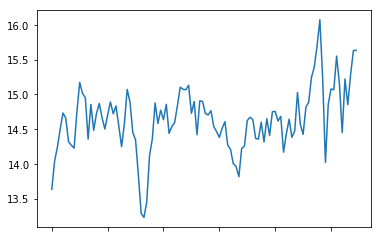

In [4]:
got = ['Liberty Broadband Corporation', '休曼纳', '诺基亚', 'Anthem Inc',
       'Spirit Realty Capital', 'EQT corp', '艾佛里管理公司', 'RSP Permian Inc',
       'Whiting Petroleum Corp', '康尼格拉']
idx = []
for g in got:
    idx.append(list(df.index).index(g))
    
print(idx)
#rounded = np.round(p[idx] / p[idx].min())
#print(rounded)   

sums = (df.T[got]).sum(axis=1)
print(sums.shape)
sums.plot()
s = sums.as_matrix()

m = s.mean()
print(m)
last = s[0] < m
reg = 0
for i in range(1, len(s)):
    if (s[i] < m) != last:
        print(i, s[i], s[i-1])
        reg+=1
        last = s[i] < m

reg